<a href="https://colab.research.google.com/github/nelsonbjr/Covid19_Crisis/blob/master/Dados_sobre_COVID_19_por_Estado_Brasileiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dados sobre COVID-19 por Estado Brasileiro**
**Fonte de Dados**

Boletins informativos e casos do coronavírus por município por dia.

https://brasil.io/dataset/covid19/caso

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set style & figures inline
sns.set()
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Importando dados do site
data = pd.read_csv('https://brasil.io/dataset/covid19/caso?format=csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25944 entries, 0 to 25943
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            25944 non-null  object 
 1   state                           25944 non-null  object 
 2   city                            24886 non-null  object 
 3   place_type                      25944 non-null  object 
 4   confirmed                       25944 non-null  int64  
 5   deaths                          25944 non-null  int64  
 6   is_last                         25944 non-null  bool   
 7   estimated_population_2019       25528 non-null  float64
 8   city_ibge_code                  25528 non-null  float64
 9   confirmed_per_100k_inhabitants  25128 non-null  float64
 10  death_rate                      6092 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(4)
memory usage: 2.0+ MB


In [3]:
data.head(n = 15)

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-04-22,AC,Acrelândia,city,12,0,True,15256.0,1200013.0,78.65758,NaN
1,2020-04-22,AC,Bujari,city,1,0,True,10266.0,1200138.0,9.74089,NaN
2,2020-04-22,AC,Cruzeiro do Sul,city,5,0,True,88376.0,1200203.0,5.65764,NaN
3,2020-04-22,AC,Plácido de Castro,city,21,1,True,19761.0,1200385.0,106.26993,0.0476
4,2020-04-22,AC,Porto Acre,city,1,0,True,18504.0,1200807.0,5.40424,NaN
5,2020-04-22,AC,Rio Branco,city,172,7,True,407319.0,1200401.0,42.22735,0.0407
6,2020-04-22,AC,Senador Guiomard,city,2,0,True,23024.0,1200450.0,8.68659,NaN
7,2020-04-22,AC,NaN,state,214,8,True,881935.0,12.0,24.26483,0.0374
8,2020-04-22,AL,Arapiraca,city,3,0,True,231747.0,2700300.0,1.29452,NaN
9,2020-04-22,AL,Boca da Mata,city,1,0,True,27281.0,2701001.0,3.66555,NaN


In [4]:
data.describe()

,confirmed,deaths,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
count,25944.000000,25944.000000,2.552800e+04,2.552800e+04,25128.000000,6092.000000
mean,42.437789,2.378585,5.393522e+05,3.212943e+06,10.100387,0.284106
std,391.187994,27.324947,2.773027e+06,1.142926e+06,23.585475,0.325228
min,0.000000,0.000000,1.149000e+03,1.100000e+01,0.002180,0.003400
25%,1.000000,0.000000,2.280000e+04,2.607208e+06,2.279770,0.052600
50%,2.000000,0.000000,5.738600e+04,3.302700e+06,4.964500,0.133300
75%,6.000000,0.000000,1.611270e+05,4.123402e+06,10.739700,0.400000
max,15914.000000,1134.000000,4.591905e+07,5.300108e+06,947.402810,1.000000


## **Manipulação dos Dados**


In [5]:
# Dados por estado
data_states = data[data.place_type.eq('state')]
data_states.head(n = 15)

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
7,2020-04-22,AC,NaN,state,214,8,True,881935.0,12.0,24.26483,0.0374
25,2020-04-22,AL,NaN,state,243,20,True,3337357.0,27.0,7.28121,0.0823
60,2020-04-22,AM,NaN,state,2479,206,True,4144597.0,13.0,59.81281,0.0831
69,2020-04-22,AP,NaN,state,492,14,True,845731.0,16.0,58.17453,0.0285
179,2020-04-22,BA,NaN,state,1645,53,True,14873064.0,29.0,11.06026,0.0322
182,2020-04-22,DF,NaN,state,959,25,True,3015268.0,53.0,31.80480,0.0261
227,2020-04-22,ES,NaN,state,1351,37,True,4018650.0,32.0,33.61825,0.0274
278,2020-04-22,GO,NaN,state,438,21,True,7018354.0,52.0,6.24078,0.0479
326,2020-04-22,MA,NaN,state,1757,76,True,7075181.0,21.0,24.83329,0.0433
471,2020-04-22,MG,NaN,state,1283,47,True,21168791.0,31.0,6.06081,0.0366


In [6]:
# Segregar dados de casos confirmados e mortes
data_states_confirmed = data_states[['date','state','confirmed']]
data_states_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 7 to 25943
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       1058 non-null   object
 1   state      1058 non-null   object
 2   confirmed  1058 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 33.1+ KB


In [7]:
data_states_deaths = data_states[['date','state','deaths']]
data_states_deaths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 7 to 25943
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1058 non-null   object
 1   state   1058 non-null   object
 2   deaths  1058 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 33.1+ KB


In [8]:
# Tabela de população de cada estado em 2019

states_pop = data_states[['state','estimated_population_2019']]
states_pop = states_pop.drop_duplicates()
states_pop.set_index('state', inplace = True)
states_pop

,estimated_population_2019
state,
AC,881935.0
AL,3337357.0
AM,4144597.0
AP,845731.0
BA,14873064.0
DF,3015268.0
ES,4018650.0
GO,7018354.0
MA,7075181.0


## **Numero de Mortes**
## **Transformação de dados**

In [9]:
# Transformar dataframe de long para wide
data_deaths = data_states_deaths.pivot(index='state', columns='date', values='deaths')
data_deaths.head()

date,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,5.0,5.0,6.0,6.0,8.0,8.0,8.0
AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,5.0,5.0,7.0,10.0,15.0,18.0,19.0,20.0
AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0,7.0,12.0,15.0,19.0,23.0,30.0,40.0,50.0,53.0,62.0,71.0,90.0,106.0,124.0,145.0,161.0,182.0,185.0,193.0,206.0
AP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,5.0,5.0,6.0,7.0,7.0,10.0,10.0,10.0,11.0,13.0,13.0,14.0
BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,3.0,6.0,7.0,9.0,10.0,14.0,18.0,19.0,19.0,21.0,21.0,22.0,26.0,28.0,34.0,36.0,40.0,45.0,47.0,48.0,53.0


In [10]:
# Verificar index das observação
data_deaths.index

Index(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS',
       'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC',
       'SE', 'SP', 'TO'],
      dtype='object', name='state')

In [11]:
# Está indexado por estado mas para criação da visualização é melhor que esteja indexado por data
data_deaths = data_deaths.transpose()
data_deaths

state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [12]:
# Verificar a indexação como data
data_deaths.index

Index(['2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
       '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
       '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15',
       '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
       '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
       '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30',
       '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
       '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
       '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14',
       '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19',
       '2020-04-20', '2020-04-21', '2020-04-22'],
      dtype='object', name='date')

In [13]:
# Conversão do index para DateTimeIndex pois está como 'object'
datetime_index = pd.DatetimeIndex(data_deaths.index)
data_deaths.set_index(datetime_index, inplace = True)
# Verificar o index novamente
data_deaths.index

DatetimeIndex(['2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03',
               '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07',
               '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15',
               '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
               '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23',
               '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
               '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31',
               '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
               '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12',
               '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16',
               '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20',
      

In [14]:
# Existem NAs entre observações válidas, provavlemente houve um falta de informação para aquele estado naquele dia. Vamos considerar este valor igual ao último valor válido para aquele estado.
data_deaths.fillna(method='ffill', inplace=True)
data_deaths

state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2020-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [15]:
# Apesar dos dados iniciais serem de fevereiro de 2020, a primeira morte ocorreu somente em 17/03/2020, portanto estas primeiras observações serão removidas
data_deaths = data_deaths.loc['2020-03-16':data_deaths.index[len(data_deaths.index)-3]]
data_deaths

state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-16,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN
2020-03-17,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,NaN
2020-03-18,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,3.0,0.0
2020-03-19,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,0.0,NaN,NaN,0.0,0.0,0.0,5.0,0.0
2020-03-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,0.0,0.0,0.0,9.0,0.0
2020-03-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0
2020-03-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0
2020-03-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0
2020-03-24,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0


## **Visualização de Dados**

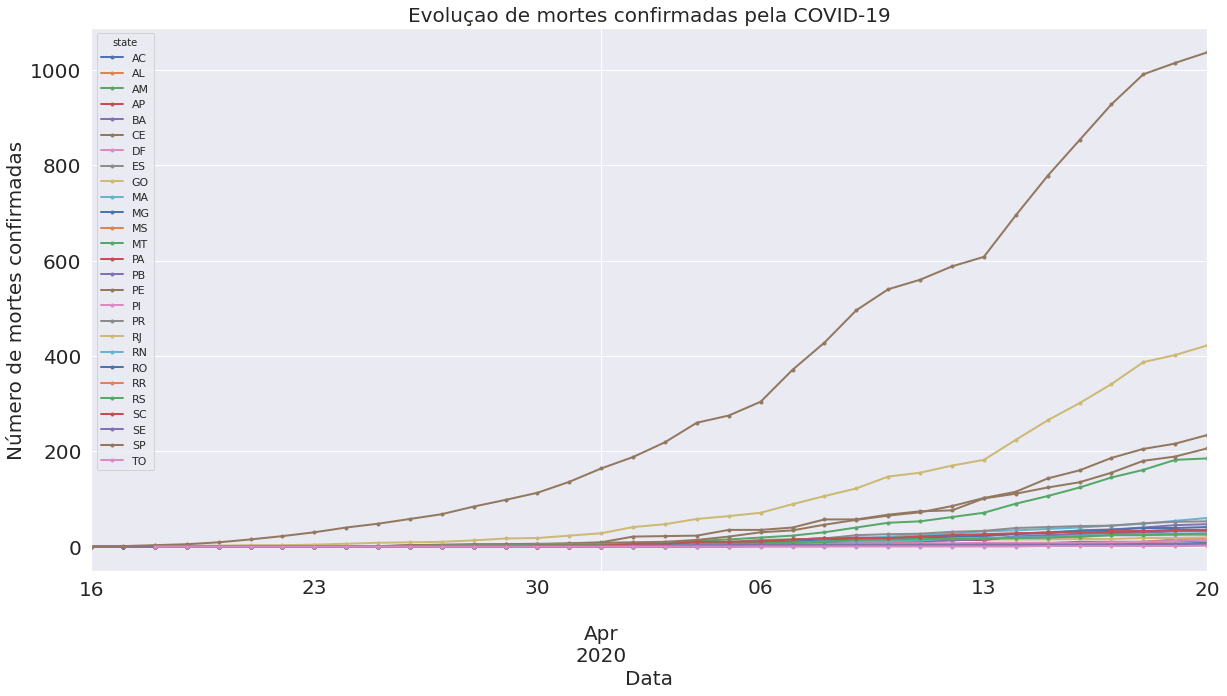

In [16]:
# Visualizar número totais de mortes por estado
data_deaths.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20)
plt.xlabel('Data', fontsize=20);
plt.ylabel('Número de mortes confirmadas', fontsize=20);
plt.title('Evoluçao de mortes confirmadas pela COVID-19', fontsize=20);

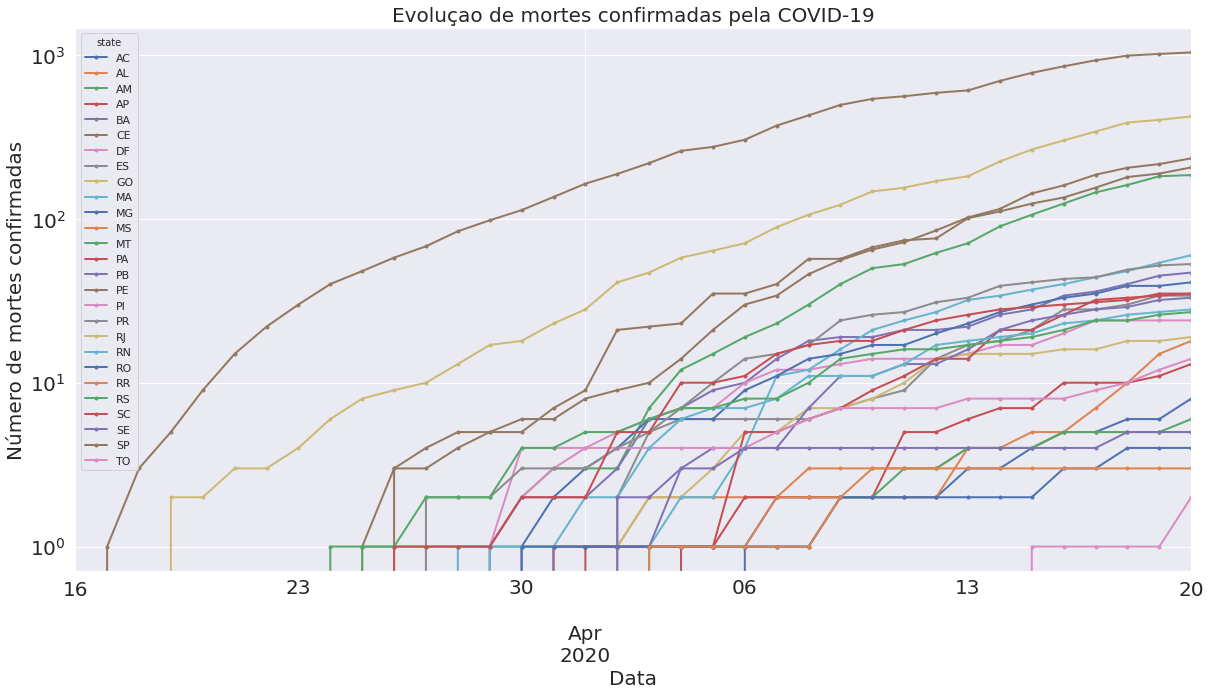

In [17]:
# Visualizar número totais de mortes por estado na escala semi-logarítmica
data_deaths.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy = True)
plt.xlabel('Data', fontsize=20);
plt.ylabel('Número de mortes confirmadas', fontsize=20);
plt.title('Evoluçao de mortes confirmadas pela COVID-19', fontsize=20);

## **Visualização de dados alinhando o primeiro dia com 5 mortes**

In [18]:
# Iterar sobre as colunas e valores < 5 serão nulos
for col in data_deaths.columns:
    data_deaths.loc[(data_deaths[col] < 5), col] = None

# Check out tail
data_deaths.tail()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-04-16,5.0,5.0,124.0,10.0,34.0,135.0,20.0,28.0,16.0,40.0,33.0,5.0,5.0,26.0,26.0,160.0,8.0,43.0,301.0,23.0,NaN,NaN,21.0,30.0,NaN,853.0,NaN
2020-04-17,5.0,7.0,145.0,10.0,36.0,155.0,24.0,28.0,16.0,44.0,35.0,5.0,5.0,32.0,28.0,186.0,9.0,44.0,341.0,24.0,NaN,NaN,24.0,31.0,NaN,928.0,NaN
2020-04-18,6.0,10.0,161.0,10.0,40.0,180.0,24.0,30.0,18.0,48.0,39.0,5.0,5.0,33.0,29.0,205.0,10.0,49.0,387.0,26.0,NaN,NaN,24.0,32.0,5.0,991.0,NaN
2020-04-19,6.0,15.0,182.0,11.0,45.0,189.0,24.0,34.0,18.0,54.0,39.0,5.0,5.0,34.0,32.0,216.0,12.0,52.0,402.0,27.0,NaN,NaN,26.0,35.0,5.0,1015.0,NaN
2020-04-20,8.0,18.0,185.0,13.0,47.0,206.0,24.0,34.0,19.0,60.0,41.0,5.0,6.0,35.0,33.0,234.0,14.0,53.0,422.0,28.0,NaN,NaN,27.0,35.0,5.0,1037.0,NaN


In [19]:

# Retirar colunas que tenham tudo NaNs (estados que ainda não chegaram a 5 mortes)
data_deaths.dropna(axis = 1, how = "all", inplace = True)
data_deaths.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2020-03-16 to 2020-04-20
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC      5 non-null      float64
 1   AL      6 non-null      float64
 2   AM      18 non-null     float64
 3   AP      10 non-null     float64
 4   BA      18 non-null     float64
 5   CE      23 non-null     float64
 6   DF      19 non-null     float64
 7   ES      18 non-null     float64
 8   GO      15 non-null     float64
 9   MA      14 non-null     float64
 10  MG      18 non-null     float64
 11  MS      5 non-null      float64
 12  MT      5 non-null      float64
 13  PA      15 non-null     float64
 14  PB      13 non-null     float64
 15  PE      24 non-null     float64
 16  PI      14 non-null     float64
 17  PR      18 non-null     float64
 18  RJ      28 non-null     float64
 19  RN      17 non-null     float64
 20  RS      20 non-null     float64
 21  SC      19 non-null  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
# Criar dataframe com a data do primeiro dia com a 5a morte em cada estado
date_5th_death = data_deaths.apply(pd.Series.first_valid_index)
df_5th_death = pd.DataFrame(date_5th_death)
df_5th_death

,0
state,
AC,2020-04-16
AL,2020-04-15
AM,2020-04-03
AP,2020-04-11
BA,2020-04-03
CE,2020-03-29
DF,2020-04-02
ES,2020-04-03
GO,2020-04-06


In [21]:
# Resetar o index, retirar a coluna de data
data_deaths_drop = data_deaths.reset_index().drop(['date'], axis = 1)
data_deaths_drop.head()

state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RS,SC,SE,SP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


In [22]:
# Trazer para cima os dados a partir do primeiro dado válido (shift)
for col in data_deaths_drop.columns:
    data_deaths_drop[col] = data_deaths_drop[col].shift(-data_deaths_drop[col].first_valid_index())
# check out head
data_deaths_drop

state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RS,SC,SE,SP
0,5.0,5.0,7.0,5.0,6.0,5.0,5.0,5.0,5.0,11.0,6.0,5.0,5.0,5.0,7.0,5.0,5.0,5.0,6.0,6.0,5.0,5.0,5.0,5.0
1,5.0,5.0,12.0,5.0,7.0,5.0,6.0,6.0,5.0,12.0,6.0,5.0,5.0,5.0,11.0,5.0,6.0,7.0,8.0,7.0,5.0,5.0,5.0,9.0
2,6.0,7.0,15.0,6.0,9.0,7.0,7.0,6.0,7.0,16.0,6.0,5.0,5.0,6.0,11.0,6.0,7.0,10.0,9.0,7.0,6.0,10.0,5.0,15.0
3,6.0,10.0,19.0,7.0,10.0,9.0,7.0,6.0,7.0,21.0,9.0,5.0,5.0,7.0,13.0,6.0,7.0,14.0,10.0,8.0,7.0,10.0,NaN,22.0
4,8.0,15.0,23.0,7.0,14.0,21.0,10.0,6.0,8.0,24.0,11.0,5.0,6.0,9.0,13.0,8.0,7.0,15.0,13.0,11.0,7.0,11.0,NaN,30.0
5,NaN,18.0,30.0,10.0,18.0,22.0,12.0,6.0,10.0,27.0,14.0,NaN,NaN,11.0,16.0,9.0,7.0,17.0,17.0,11.0,8.0,15.0,NaN,40.0
6,NaN,NaN,40.0,10.0,19.0,23.0,12.0,7.0,14.0,32.0,15.0,NaN,NaN,14.0,21.0,10.0,8.0,24.0,18.0,11.0,8.0,17.0,NaN,48.0
7,NaN,NaN,50.0,10.0,19.0,35.0,13.0,8.0,15.0,34.0,17.0,NaN,NaN,14.0,24.0,14.0,8.0,26.0,23.0,13.0,10.0,18.0,NaN,58.0
8,NaN,NaN,53.0,11.0,21.0,35.0,14.0,9.0,15.0,37.0,17.0,NaN,NaN,21.0,26.0,21.0,8.0,27.0,28.0,17.0,14.0,18.0,NaN,68.0
9,NaN,NaN,62.0,13.0,21.0,40.0,14.0,14.0,15.0,40.0,20.0,NaN,NaN,21.0,28.0,30.0,8.0,31.0,41.0,18.0,15.0,21.0,NaN,84.0


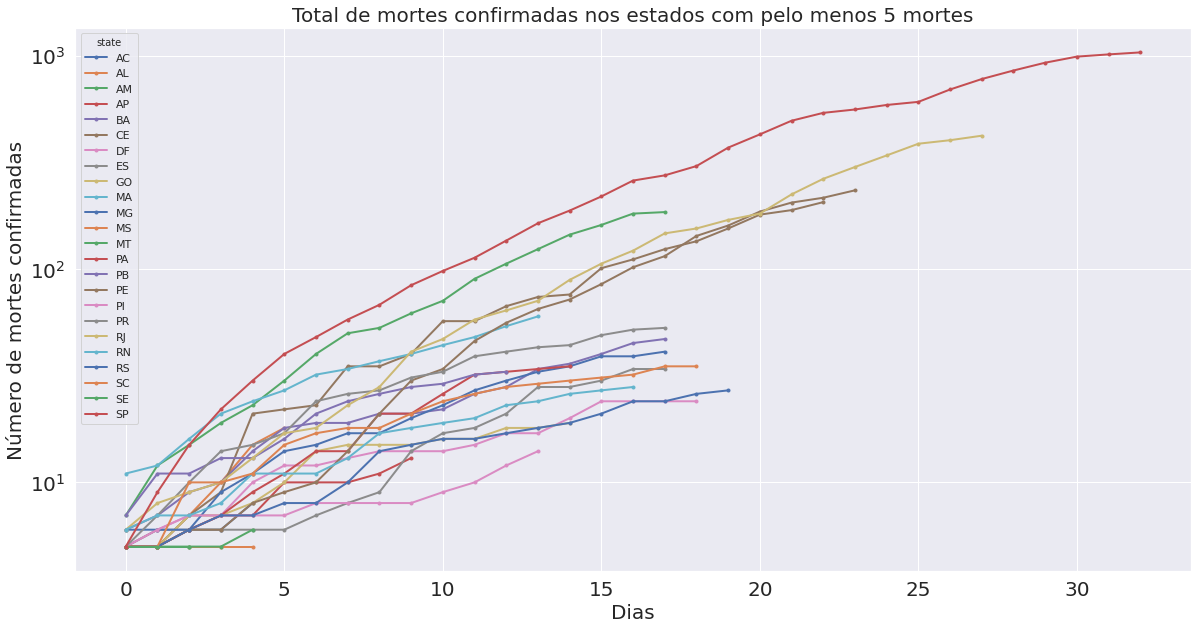

In [23]:
# Evolução na escala semi-logarítimica 
data_deaths_drop.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy = True)
plt.xlabel('Dias', fontsize=20);
plt.ylabel('Número de mortes confirmadas', fontsize=20);
plt.title('Total de mortes confirmadas nos estados com pelo menos 5 mortes', fontsize=20);

## **Visualização interativa com Altair**

In [24]:
# Transformar dados em long para utilizar no altair
# Endereço da Biblioteca: https://matthewkudija.com/blog/2018/06/22/altair-interactive/
deaths_long = data_deaths_drop.reset_index().melt(id_vars = 'index', value_name = 'Deaths').rename(columns={'index':'Day'})
deaths_long

,Day,state,Deaths
0,0,AC,5.0
1,1,AC,5.0
2,2,AC,6.0
3,3,AC,6.0
4,4,AC,8.0
...,...,...,...
859,31,SP,1015.0
860,32,SP,1037.0
861,33,SP,NaN
862,34,SP,NaN


In [25]:
# Adicionar primeiro dia da 5a morte por estado
deaths_long = deaths_long.merge(df_5th_death, left_on='state', right_index=True, how='left')
deaths_long

,Day,state,Deaths,0
0,0,AC,5.0,2020-04-16
1,1,AC,5.0,2020-04-16
2,2,AC,6.0,2020-04-16
3,3,AC,6.0,2020-04-16
4,4,AC,8.0,2020-04-16
...,...,...,...,...
859,31,SP,1015.0,2020-03-19
860,32,SP,1037.0,2020-03-19
861,33,SP,NaN,2020-03-19
862,34,SP,NaN,2020-03-19


In [26]:
# Adicionar coluna com a data de cada observação
from datetime import datetime  
from datetime import timedelta 
deaths_long['Date'] = deaths_long.iloc[:,3] + deaths_long['Day'].map(timedelta)
deaths_long

,Day,state,Deaths,0,Date
0,0,AC,5.0,2020-04-16,2020-04-16
1,1,AC,5.0,2020-04-16,2020-04-17
2,2,AC,6.0,2020-04-16,2020-04-18
3,3,AC,6.0,2020-04-16,2020-04-19
4,4,AC,8.0,2020-04-16,2020-04-20
...,...,...,...,...,...
859,31,SP,1015.0,2020-03-19,2020-04-19
860,32,SP,1037.0,2020-03-19,2020-04-20
861,33,SP,NaN,2020-03-19,2020-04-21
862,34,SP,NaN,2020-03-19,2020-04-22


In [27]:
# Remover coluna com primeiro dia da 5a morte
deaths_long = deaths_long.drop([deaths_long.columns[3]] ,  axis='columns')
deaths_long

,Day,state,Deaths,Date
0,0,AC,5.0,2020-04-16
1,1,AC,5.0,2020-04-17
2,2,AC,6.0,2020-04-18
3,3,AC,6.0,2020-04-19
4,4,AC,8.0,2020-04-20
...,...,...,...,...
859,31,SP,1015.0,2020-04-19
860,32,SP,1037.0,2020-04-20
861,33,SP,NaN,2020-04-21
862,34,SP,NaN,2020-04-22


In [28]:
# Adicionar população por estado
deaths_long = deaths_long.merge(states_pop, left_on='state', right_index=True, how='left')
deaths_long.head()

,Day,state,Deaths,Date,estimated_population_2019
0,0,AC,5.0,2020-04-16,881935.0
1,1,AC,5.0,2020-04-17,881935.0
2,2,AC,6.0,2020-04-18,881935.0
3,3,AC,6.0,2020-04-19,881935.0
4,4,AC,8.0,2020-04-20,881935.0


In [29]:
# Adicionar taxa de mortes a cada 100.000 habitantes
deaths_long['DeathPop'] = deaths_long['Deaths']/deaths_long['estimated_population_2019']*100000
deaths_long.head()

,Day,state,Deaths,Date,estimated_population_2019,DeathPop
0,0,AC,5.0,2020-04-16,881935.0,0.566935
1,1,AC,5.0,2020-04-17,881935.0,0.566935
2,2,AC,6.0,2020-04-18,881935.0,0.680322
3,3,AC,6.0,2020-04-19,881935.0,0.680322
4,4,AC,8.0,2020-04-20,881935.0,0.907096


In [30]:
# drop NaNs
deaths_long = deaths_long.dropna()
deaths_long

,Day,state,Deaths,Date,estimated_population_2019,DeathPop
0,0,AC,5.0,2020-04-16,881935.0,0.566935
1,1,AC,5.0,2020-04-17,881935.0,0.566935
2,2,AC,6.0,2020-04-18,881935.0,0.680322
3,3,AC,6.0,2020-04-19,881935.0,0.680322
4,4,AC,8.0,2020-04-20,881935.0,0.907096
...,...,...,...,...,...,...
856,28,SP,853.0,2020-04-16,45919049.0,1.857617
857,29,SP,928.0,2020-04-17,45919049.0,2.020948
858,30,SP,991.0,2020-04-18,45919049.0,2.158146
859,31,SP,1015.0,2020-04-19,45919049.0,2.210412


In [31]:
import altair as alt

# Selection tool
selection = alt.selection_single(fields=['state'])
# Color change when clicked
color = alt.condition(selection,
                    alt.Color('state:N'),
                    alt.value('lightgray'))


# Base altair plot 
base = alt.Chart(deaths_long, title="Total de mortes confirmadas pelo COVID-19 por estado brasileiro").mark_line(strokeWidth=4, opacity=0.7).encode(
    x=alt.X('Day'),
    y=alt.Y('Deaths', scale=alt.Scale(type='log')),
    color=alt.Color('state', legend=None),
).properties(
    width=650,
    height=800
)

# Chart
chart = base.encode(
  color=alt.condition(selection, 'state:N', alt.value('lightgray')),
  tooltip=['state:N', 'yearmonthdate(Date):N', 'Deaths:N']
).add_selection(
  selection
)

# Overlay
overlay = base.encode(
  color='state',
  opacity=alt.value(0.5),
).transform_filter(
  selection
)

# Text labels
text = base.mark_text(
    align='left',
    dx=5,
    size=15
).encode(
    x=alt.X('Day', aggregate='max',  axis=alt.Axis(title='Dias a partir da 5a morte no estado')),
    y=alt.Y('Deaths', aggregate={'argmax': 'Day'}, axis=alt.Axis(title='Mortes confirmadas (escala logarítmica)')),
    text='state'
).transform_filter(
    selection
)

# Add doubling line

## Death doubles every 2 days
j = 0
for i in range(0,deaths_long.Day.max()):
    if 5*pow(2,(i/2)) < deaths_long.Deaths.max():
      j = i+2

source2 = alt.sequence(start=0, stop=j, step=1, as_='x')

double2 = alt.Chart(source2).mark_line(strokeDash=[2,2]).transform_calculate(
    double2='5*pow(2,(datum.x/2))'
).transform_fold(
    ['double2']
).encode(
    x='x:Q',
    y='value:Q',
    color=alt.value('lightgray')
)

text2 = alt.Chart({'values':[{'x': 13, 'y': 500}]}).mark_text(
    text='mortes duplicam a cada 2 dias', angle=305,
    size=13,
    color = 'gray'
).encode(
    x='x:Q', y='y:Q'
)

## Death doubles every 5 days
j = 0
for i in range(0,deaths_long.Day.max()):
    if 5*pow(2,(i/5)) < deaths_long.Deaths.max():
      j = i+2

source5 = alt.sequence(start=0, stop=j, step=1, as_='x')

double5 = alt.Chart(source5).mark_line(strokeDash=[2,2]).transform_calculate(
    double5='5*pow(2,(datum.x/5))'
).transform_fold(
    ['double5']
).encode(
    x='x:Q',
    y='value:Q',
    color=alt.value('lightgray')
)

text5 = alt.Chart({'values':[{'x': 24, 'y': 150}]}).mark_text(
    text='a cada 5 dias', angle=329,
    size=13,
    color = 'gray'
).encode(
    x='x:Q', y='y:Q'
)

## Death doubles every 10 days
j = 0
for i in range(0,deaths_long.Day.max()):
    if 5*pow(2,(i/10)) < deaths_long.Deaths.max():
      j = i+2

source10 = alt.sequence(start=0, stop=j, step=1, as_='x')

double10 = alt.Chart(source10).mark_line(strokeDash=[2,2]).transform_calculate(
    double10='5*pow(2,(datum.x/10))'
).transform_fold(
    ['double10']
).encode(
    x='x:Q',
    y='value:Q',
    color=alt.value('lightgray')
)

text10 = alt.Chart({'values':[{'x': 24, 'y': 28}]}).mark_text(
    text='a cada 10 dias', angle=343,
    size=13,
    color = 'gray'
).encode(
    x='x:Q', y='y:Q'
)

# Sum it all up
alt.layer(chart, overlay, text, double2, double5, double10, text2, text5, text10).configure_axis(
    labelFontSize=15,
    titleFontSize=20
).configure_title(
    fontSize=23
)


# Sum em up!
#chart + overlay + text

alt.LayerChart(...)

In [32]:
# Mortes por habitantes

# Base altair plot 
basepop = alt.Chart(deaths_long, title="Mortes confirmadas pelo COVID-19 a cada 100 mil habitantes").mark_line(strokeWidth=4, opacity=0.7).encode(
    x=alt.X('Day'),
    y=alt.Y('DeathPop'),
    color=alt.Color('state', legend=None),
).properties(
    width=650,
    height=800
)

# Chart
chartpop = basepop.encode(
  color=alt.condition(selection, 'state:N', alt.value('lightgray')),
  tooltip=['state:N', 'yearmonthdate(Date):N', 'Deaths:N']
).add_selection(
  selection
)

# Overlay
overlaypop = basepop.encode(
  color='state',
  opacity=alt.value(0.5),
).transform_filter(
  selection
)

# Text labels
textpop = basepop.mark_text(
    align='left',
    dx=5,
    size=15
).encode(
    x=alt.X('Day', aggregate='max',  axis=alt.Axis(title='Dias a partir da 5a morte no estado')),
    y=alt.Y('DeathPop', aggregate={'argmax': 'Day'}, axis=alt.Axis(title='Mortes confirmadas a cada 100 mil habitantes')),
    text='state'
).transform_filter(
    selection
)

# Sum em up!
alt.layer(chartpop + overlaypop + textpop).configure_axis(
    labelFontSize=15,
    titleFontSize=20
).configure_title(
    fontSize=23
)

alt.LayerChart(...)

In [33]:
double2 = alt.Chart(source2).mark_line().transform_calculate(
    double2='5*pow(2,(datum.x/2))'
).transform_fold(
    ['double2']
).encode(
    x='x:Q',
    y=alt.Y('value:Q', scale=alt.Scale(type='log')),
    color=alt.value('lightgray')
)

source5 = alt.sequence(start=0, stop=28, step=1, as_='x')

double5 = alt.Chart(source5).mark_line().transform_calculate(
    double5='5*pow(2,(datum.x/5))'
).transform_fold(
    ['double5']
).encode(
    x='x:Q',
    y='value:Q',
    color=alt.value('lightgray')
)

text2 = alt.Chart({'values':[{'x': 12, 'y': 400}]}).mark_text(
    text='doubles every 2 days', angle=314,
    color = 'gray'
).encode(
    x='x:Q', y='y:Q'
)

text5 = alt.Chart({'values':[{'x': 20, 'y': 100}]}).mark_text(
    text='doubles every 5 days', angle=339,
    color = 'gray'
).encode(
    x='x:Q', y='y:Q'
)

double2 + double5 + text2 + text5


alt.LayerChart(...)